## MLP
### Uma MLP (Multi-Layer Perceptron) é um tipo de rede neural artificial composta por várias camadas de neurônios, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. No contexto de modelos de classificação multiclasse em aprendizado de máquina, a MLP é uma arquitetura poderosa que pode aprender a mapear entradas para múltiplas classes de saída.

------------------------------------------------------

### **1. Camada de Entrada**
#### A primeira camada da MLP consiste nos neurônios de entrada, onde cada neurônio representa uma característica (ou atributo) dos dados de entrada. Se os dados de entrada tiverem, por exemplo, 10 características, haverá 10 neurônios nesta camada.

### **2. Camadas Ocultas**
#### Após a camada de entrada, uma ou mais camadas ocultas processam esses dados. Cada camada oculta é composta por um número definido de neurônios. Cada neurônio em uma camada oculta é conectado a todos os neurônios da camada anterior (entrada ou outra camada oculta) através de pesos que são ajustados durante o treinamento da rede. Cada neurônio em uma camada oculta calcula uma combinação linear das saídas da camada anterior, aplicando então uma função de ativação não linear (como a função sigmoid, tanh, ReLU, etc.). Esta função de ativação é crucial para introduzir não linearidades na rede, permitindo que ela aprenda relações complexas nos dados.

### **3. Camada de Saída**
#### A última camada da MLP é a camada de saída, que determina como a rede neural responde após processar os dados de entrada. Para um problema de classificação multiclasse, a camada de saída terá um número de neurônios igual ao número de classes que a rede deve prever. Cada neurônio na camada de saída corresponde a uma classe possível e produz uma saída que representa a probabilidade de a entrada pertencer a essa classe específica. Essas probabilidades são calculadas usando uma função de ativação na camada de saída, comumente a função softmax, que garante que as saídas sejam valores entre 0 e 1 e que a soma de todas as saídas seja igual a 1. Isso é fundamental para interpretar a saída como uma distribuição de probabilidade sobre as classes.

### **4. Treinamento da MLP**
#### Durante o treinamento, a MLP ajusta os pesos de todas as conexões (sinapses) entre os neurônios usando algoritmos de otimização, como o gradiente descendente estocástico (SGD), para minimizar uma função de perda. A função de perda é escolhida de acordo com o problema específico, mas para classificação multiclasse, frequentemente usa-se a entropia cruzada categórica (categorical cross-entropy), que é adequada para avaliar a discrepância entre as distribuições de probabilidade preditas e as verdadeiras.

### **5. Predição**
#### Após o treinamento, a MLP pode ser usada para predizer a classe de novos dados. Isso envolve passar os dados de entrada através da rede neural, aplicando os pesos aprendidos e calculando as saídas da camada de saída usando a função softmax.

------------------------------------------------------------------------

### Uma MLP para classificação multiclasse funciona transformando as entradas através de múltiplas camadas ocultas para aprender representações complexas dos dados e, finalmente, gerar distribuições de probabilidade sobre várias classes na camada de saída. A capacidade da rede de aprender essas representações é o que permite que ela seja eficaz na classificação de dados em múltiplas categorias distintas.

### Para treinar um modelo de MLP (Multilayer Perceptron) para classificação multiclasse da coluna 'PROF_MATEMATICA_CATEG' usando os parâmetros especificados, você pode seguir os passos abaixo utilizando Python e bibliotecas como pandas, scikit-learn e keras/tensorflow para construir e treinar a rede neural.

### **1. Preparação dos Dados**
#### Primeiro, é necessário carregar e preparar os dados codificados do arquivo CSV:

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

In [7]:
# Carregar os dados do CSV
gnetDf = pd.read_csv('datasets/CLASS.csv')

In [9]:
# Selecionar as colunas de interesse
features = ['SEXO_CATEG', 'IDADE_CATEG', 'FORMACAO_MAE_CATEG', 'FORMACAO_PAI_CATEG', 'ACESSO_INTERNET_CATEG',
            'NUMERO_COMPUTADORES_CATEG', 'INICIOU_ESTUDOS_CATEG', 'ENSINO_FUNDAMENTAL_CATEG', 'REPROVOU_CATEG',
            'ABANDONOU_CATEG', 'GESTAO_CATEG', 'DUVIDAS_CATEG', 'CORRIGEM_CATEG',
            'PONTOS_PORTUGUES_CATEG', 'PROF_PORTUGUES_CATEG','TURNO_ESCOLAR_CATEG']

# Retirar 'PONTOS_MATEMATICA_CATEG' por conta do viés com a coluna target
target = 'PROF_MATEMATICA_CATEG'
# Selecionar features e variável alvo no DataFrame
data = gnetDf[features + [target]]

In [10]:
# Dividir os dados em conjunto de treino e teste (por exemplo, 90% treino, 10% teste)
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Separar features e variável alvo no conjunto de treino
X_train = train_data[features]
y_train = train_data[target]

# Separar features e variável alvo no conjunto de teste
X_test = test_data[features]
y_test = test_data[target]

In [11]:
# Padronizar os dados (importante para redes neurais)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **2. Treinamento do Modelo MLP**
#### Aqui você pode configurar e treinar o modelo MLP com os parâmetros especificados:

In [12]:
# Definir o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', alpha=0.0001,
                    max_iter=1000, random_state=42)

# Treinar o modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

### **3. Avaliação do Modelo**
#### Depois de treinar o modelo, você pode avaliá-lo usando métricas apropriadas para classificação multiclasse, como a acurácia:

In [13]:
# Previsões no conjunto de teste
y_pred = mlp.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[ 374  817   46   10    0]
 [ 368 1638  243   61    5]
 [  57  671  228  110   14]
 [  10  202  141  118   19]
 [   0   16   44   49    9]]


In [16]:
# Imprimir o relatório de classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=['1', '2', '3', '4','5']))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.46      0.30      0.36      1247
           2       0.49      0.71      0.58      2315
           3       0.32      0.21      0.26      1080
           4       0.34      0.24      0.28       490
           5       0.19      0.08      0.11       118

    accuracy                           0.45      5250
   macro avg       0.36      0.31      0.32      5250
weighted avg       0.43      0.45      0.42      5250



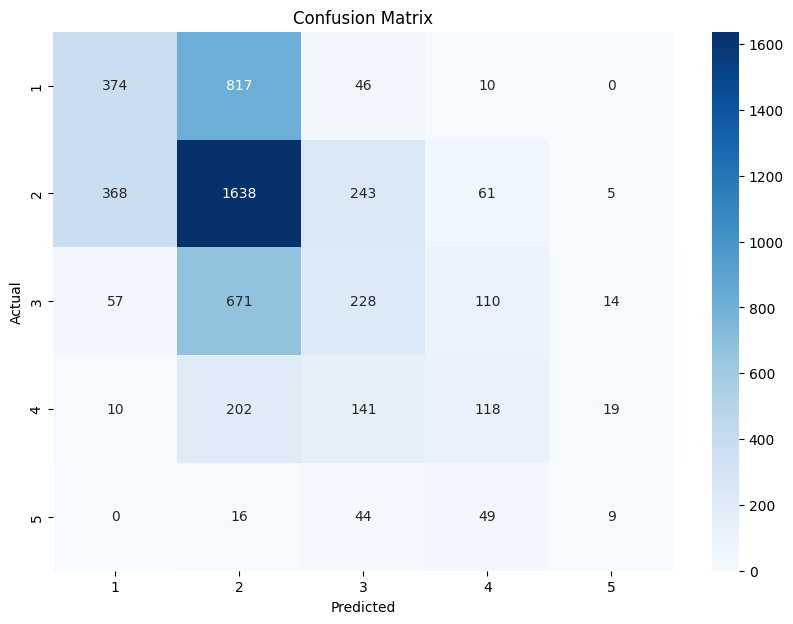

In [17]:
# Visualizar a matriz de confusão usando seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '2', '3','4' ,'5'], yticklabels=['1', '2', '3','4' ,'5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()